In [2]:
import os
import timeit
from datetime import timedelta
import requests

import cdflib
import humanize
import matplotlib.pyplot as plt
import pycdfpp

from spacepy import pycdf

In [12]:
def download_file(url):
    fname  = url.split('/')[-1]
    if not os.path.exists(f"/tmp/cdfpp/{fname}"):
        with open(f"/tmp/cdfpp/{fname}", 'wb') as f:
            print(f"downloading {url}")
            f.write(requests.get(url).content)
    return fname


urls = [
    "https://hephaistos.lpp.polytechnique.fr/data/mirrors/CDF/test_files/po_h9_pwi_1997010103_v01.cdf",
    "https://hephaistos.lpp.polytechnique.fr/data/mirrors/CDF/test_files/bigcdf_compressed.cdf",
    "https://hephaistos.lpp.polytechnique.fr/data/mirrors/CDF/test_files/mms1_scm_srvy_l2_scsrvy_20190301_v2.2.0.cdf",
    "https://lasp.colorado.edu/mms/sdc/public/about/browse/mms1/edp/fast/l2/dce/2022/11/mms1_edp_fast_l2_dce_20221110_v3.0.0.cdf",
    "https://lasp.colorado.edu/mms/sdc/public/about/browse/mms1/fpi/fast/l2/des-dist/2022/11/mms1_fpi_fast_l2_des-dist_20221103060000_v3.4.0.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221118_v01.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221108_v01.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221027_v01.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221129_v01.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221023_v01.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221003_v01.cdf",
    "https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20220906_v01.cdf"
]

cdf_corpus = list(map(lambda u: f"/tmp/cdfpp/{u.split('/')[-1]}", urls))

In [13]:
list(map(download_file, urls))

downloading https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221129_v01.cdf
downloading https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221023_v01.cdf
downloading https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20221003_v01.cdf
downloading https://cdaweb.gsfc.nasa.gov/pub/data/solar-orbiter/rpw/science/l3/bia-efield/2022/solo_l3_rpw-bia-efield_20220906_v01.cdf


['po_h9_pwi_1997010103_v01.cdf',
 'bigcdf_compressed.cdf',
 'mms1_scm_srvy_l2_scsrvy_20190301_v2.2.0.cdf',
 'mms1_edp_fast_l2_dce_20221110_v3.0.0.cdf',
 'mms1_fpi_fast_l2_des-dist_20221103060000_v3.4.0.cdf',
 'solo_l3_rpw-bia-efield_20221118_v01.cdf',
 'solo_l3_rpw-bia-efield_20221108_v01.cdf',
 'solo_l3_rpw-bia-efield_20221027_v01.cdf',
 'solo_l3_rpw-bia-efield_20221129_v01.cdf',
 'solo_l3_rpw-bia-efield_20221023_v01.cdf',
 'solo_l3_rpw-bia-efield_20221003_v01.cdf',
 'solo_l3_rpw-bia-efield_20220906_v01.cdf']

In [5]:
class CdfLib:
    @staticmethod
    def just_open(fname):
        c = cdflib.CDF(fname)

    @staticmethod
    def list_variables(fname):
        c = cdflib.CDF(fname)
        cdf_info = c.cdf_info()
        variables = cdf_info.rVariables + cdf_info.zVariables

    @staticmethod
    def get_var_shape(fname, varname):
        shape = cdflib.CDF(fname).varinq(varname).Dim_Sizes

    @staticmethod
    def get_var_data(fname, varname, ntimes=1):
        c = cdflib.CDF(fname)
        for _ in range(ntimes):
            values = c.varget(varname)


class SpacePy:
    @staticmethod
    def just_open(fname):
        c = pycdf.CDF(fname)

    @staticmethod
    def list_variables(fname):
        variables = list(pycdf.CDF(fname))

    @staticmethod
    def get_var_shape(fname, varname):
        shape = pycdf.CDF(fname)[varname].shape

    @staticmethod
    def get_var_data(fname, varname, ntimes=1):
        c = pycdf.CDF(fname)
        for _ in range(ntimes):
            values = c[varname][:]


class PyCdfPp:
    @staticmethod
    def just_open(fname):
        c = pycdfpp.load(fname)

    @staticmethod
    def list_variables(fname):
        variables = list(pycdfpp.load(fname))

    @staticmethod
    def get_var_shape(fname, varname):
        shape = pycdfpp.load(fname)[varname].shape

    @staticmethod
    def get_var_data(fname, varname, ntimes=1):
        c = pycdfpp.load(fname)
        for _ in range(ntimes):
            values = c[varname].values

In [6]:
def bench_method(method, cdf_file, number=1000, **kwargs):
    return dict(
        sorted(
            [
                (
                    lib.__name__,
                    timeit.timeit(
                        lambda: getattr(lib, method)(cdf_file, **kwargs), number=number
                    )
                    / number,
                )
                for lib in (CdfLib, SpacePy, PyCdfPp)
            ],
            key=lambda item: item[1],
        )
    )

In [14]:
for file in cdf_corpus:
    print(f"{file}: {bench_method('just_open', file, number=10)}")

/tmp/cdfpp/po_h9_pwi_1997010103_v01.cdf: {'PyCdfPp': 0.00017465760001869057, 'CdfLib': 0.00019743439997910173, 'SpacePy': 0.0013674771999831136}
/tmp/cdfpp/bigcdf_compressed.cdf: {'PyCdfPp': 4.1726400013430975e-05, 'CdfLib': 9.148350000032224e-05, 'SpacePy': 0.006317985600071551}
/tmp/cdfpp/mms1_scm_srvy_l2_scsrvy_20190301_v2.2.0.cdf: {'PyCdfPp': 7.444359998771688e-05, 'CdfLib': 0.0001286544999857142, 'SpacePy': 0.07488809540000148}
/tmp/cdfpp/mms1_edp_fast_l2_dce_20221110_v3.0.0.cdf: {'CdfLib': 6.978670007811161e-05, 'PyCdfPp': 0.00016974700001810562, 'SpacePy': 0.35710396820004464}
/tmp/cdfpp/mms1_fpi_fast_l2_des-dist_20221103060000_v3.4.0.cdf: {'CdfLib': 7.033869997030706e-05, 'PyCdfPp': 0.00016071110003395005, 'SpacePy': 0.22939853950001635}
/tmp/cdfpp/solo_l3_rpw-bia-efield_20221118_v01.cdf: {'CdfLib': 7.315900002140552e-05, 'PyCdfPp': 0.00010246440006085322, 'SpacePy': 0.3560861213999488}
/tmp/cdfpp/solo_l3_rpw-bia-efield_20221108_v01.cdf: {'CdfLib': 7.064419996822835e-05, 'PyCdf

In [15]:
for file in cdf_corpus:
    print(f"{file}: {bench_method('list_variables', file, number=10)}")

/tmp/cdfpp/po_h9_pwi_1997010103_v01.cdf: {'PyCdfPp': 0.0004397436999170168, 'CdfLib': 0.0008901664000404708, 'SpacePy': 0.0019434917000580754}
/tmp/cdfpp/bigcdf_compressed.cdf: {'PyCdfPp': 4.000930002803216e-05, 'CdfLib': 0.00018436990003465326, 'SpacePy': 0.007342753300054028}
/tmp/cdfpp/mms1_scm_srvy_l2_scsrvy_20190301_v2.2.0.cdf: {'PyCdfPp': 9.068869994734995e-05, 'CdfLib': 0.000554038300015236, 'SpacePy': 0.07428468980006073}
/tmp/cdfpp/mms1_edp_fast_l2_dce_20221110_v3.0.0.cdf: {'PyCdfPp': 0.00019020620002265786, 'CdfLib': 0.0003931492999981856, 'SpacePy': 0.35737519610001983}
/tmp/cdfpp/mms1_fpi_fast_l2_des-dist_20221103060000_v3.4.0.cdf: {'PyCdfPp': 0.00019275120002930634, 'CdfLib': 0.000519059200087213, 'SpacePy': 0.23009514280001894}
/tmp/cdfpp/solo_l3_rpw-bia-efield_20221118_v01.cdf: {'PyCdfPp': 0.00011784670004999498, 'CdfLib': 0.0006292430999565113, 'SpacePy': 0.360084443300002}
/tmp/cdfpp/solo_l3_rpw-bia-efield_20221108_v01.cdf: {'PyCdfPp': 0.00010691139996197308, 'CdfLib':

In [9]:
bench_method(
    "get_var_shape",
    "/tmp/cdfpp/po_h9_pwi_1997010103_v01.cdf",
    varname="WBR_Elec",
    number=10000,
)

{'CdfLib': 0.00010431646050001291,
 'PyCdfPp': 0.00013730515209999793,
 'SpacePy': 0.000916535619699971}

In [10]:
bench_method(
    "get_var_data",
    "/tmp/cdfpp/po_h9_pwi_1997010103_v01.cdf",
    varname="WBR_Elec",
    number=10,
)

{'PyCdfPp': 0.3873259066000173,
 'SpacePy': 2.494506395299959,
 'CdfLib': 2.5678414205999616}

In [11]:
bench_method(
    "get_var_data",
    "/tmp/cdfpp/po_h9_pwi_1997010103_v01.cdf",
    varname="WBR_Elec",
    ntimes=3,
    number=2,
)

{'PyCdfPp': 0.40094440350003424,
 'CdfLib': 7.95899667499998,
 'SpacePy': 7.966956516499977}

In [56]:
pycdfpp.load(fname)

CDF:
version: 2.6.2
majority: row

Attributes:
	Rules_of_use: " "
	Acknowledgement: " "
	HTTP_LINK: [ [ "http://www-pw.physics.uiowa.edu/plasma-wave/istp/polar/home.html", "http:/www-pw.physics.uiowa.edu/plasma-wave/istp/polar/interpretation.html" ] ]
	TEXT_supplement_1: " "
	Time_resolution: "1.0/Sample_rate"
	Generated_by: " "
	Mission_group: "Polar"
	TITLE: "POLAR PWI WBR"
	Project: "ISTP>International Solar-Terrestrial Physics"
	Discipline: "Space Physics>Magnetospheric Science"
	Instrument_type: "Radio and Plasma Waves (space)"
	MODS: "Created Dec 2003"
	LINK_TEXT: " "
	LINK_TITLE: " "
	Generation_date: "20 April, 2004"
	Data_type: "H9>High Resolution Data"
	Logical_source_description: "Polar Plasma Wave Instrument, High Frequency Waveform Receiver"
	Descriptor: "PWI>Plasma Wave Instrument"
	Data_version: "1"
	Logical_file_id: "PO_H9_PWI_1996032614_V01"
	TEXT: [ [ "Reference:..Gurnett, D.A. et al, The Polar plasma wave instrument, Space Science Reviews, Vol. 71, pp. 597-622, 1995.

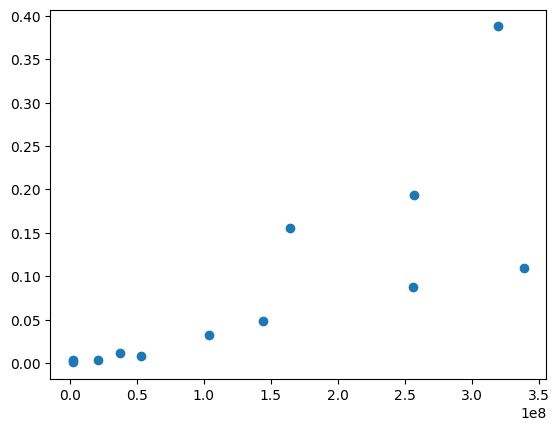

In [21]:
times = []
sizes = []
for f in cdf_corpus:
    t=timeit.timeit(lambda:pycdfpp.load(f, lazy_load=False), number=10)/10
    times.append(t)
    sizes.append(len(open(f,'rb').read()))
    
plt.figure()
plt.scatter(sizes,times)